@author: [s16496@pjwstk.edu.pl](mailto:s16496@pjwstk.edu.pl)

Pobieram potrzebne mi biblioteki NumPy - do operacji na tablicach, Pandas - do analizy i czyszczenia danych, Sklearn - do machine learningu oraz plotly express, matplotlib i seaborn do wizualizacji

In [3]:
import plotly
import plotly.express as px
import numpy as np
import pandas as pd

Pobieram i obrabiam dane

In [4]:
facebook_data = pd.read_csv('drive/MyDrive/dataset_Facebook.csv', ";")
facebook_data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [5]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [6]:
px.scatter_matrix(data_frame=facebook_data, dimensions=['Type', 'like','share', 'Total Interactions'],
                  color='Category', title='Scatter Matrix - facebook')

Sprawdzam ilość udostępnień w stosunku do lików

In [7]:
facebook_data = facebook_data[['like', 'share']]
facebook_data

,like,share
0,79.0,17.0
1,130.0,29.0
2,66.0,14.0
3,1572.0,147.0
4,325.0,49.0
...,...,...
495,53.0,26.0
496,53.0,22.0
497,93.0,18.0
498,91.0,38.0


In [8]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   like    499 non-null    float64
 1   share   496 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
with pd.option_context('mode.use_inf_as_null', True):
   facebook_data = facebook_data.dropna()

In [10]:
facebook_data.astype('int32').dtypes

like     int32
share    int32
dtype: object

Tworze zbiór testowy i treningowy

In [11]:
from sklearn.model_selection import train_test_split
facebook_data_test, facebook_data_train = train_test_split(facebook_data, test_size=70)

In [12]:
facebook_data_train

,like,share
389,37.0,3.0
262,61.0,16.0
121,186.0,40.0
206,859.0,68.0
440,28.0,7.0
...,...,...
6,249.0,27.0
480,360.0,99.0
337,79.0,16.0
378,152.0,11.0


In [13]:
facebook_data_test

,like,share
276,25.0,5.0
408,36.0,7.0
16,40.0,12.0
14,577.0,20.0
43,29.0,10.0
...,...,...
416,25.0,6.0
280,40.0,8.0
270,696.0,28.0
258,167.0,26.0


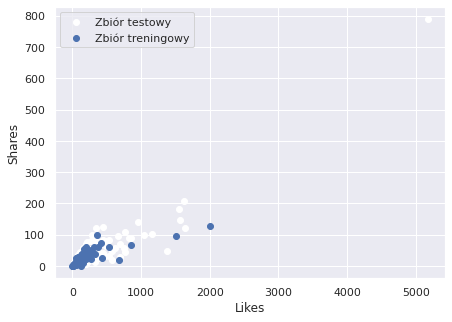

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(facebook_data_test.like, facebook_data_test.share, c='w', label='Zbiór testowy')
plt.scatter(facebook_data_train.like, facebook_data_train.share, c='b', label='Zbiór treningowy')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.legend()

Stosuje regresję i oceniam model

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(facebook_data_train.like.values.reshape(-1, 1), facebook_data_train.share)

lin_reg.score(facebook_data_train.like.values.reshape(-1, 1), facebook_data_train.share)

0.6008318124241289

## SVM

Wykorzystuje Support Vector regression typ support vector machine obsługujący regresję

Importuje potrzebne metody

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Standaryzuje cechy (usunięcie średniej, skalowanie do wariancji jednostkowek)

In [17]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(facebook_data_train.like.values.reshape(-1, 1))
y = sc_y.fit_transform(facebook_data_train.share.values.reshape(-1, 1))

Ustawiam typ regresji na linearną i przypisuje do niej dane

In [18]:
regressor = SVR(kernel='linear')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Wizualizacja rezultatu SVR

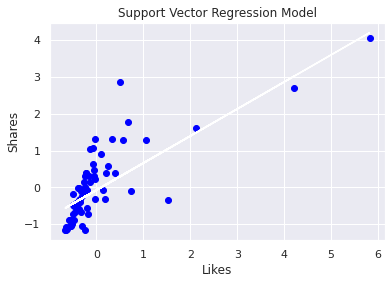

In [19]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'white')
plt.title('Support Vector Regression Model')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.show()

## Sieć neuronowa - na bazie TensorFLow

Importuje TensorFlow

In [20]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


Wydzielam cechę którą będzie przewidywał model

In [22]:
train_features = facebook_data_train.copy()
test_features = facebook_data_train.copy()

train_labels = train_features.pop('share')
test_labels = test_features.pop('share')

In [23]:
train_labels

389     3.0
262    16.0
121    40.0
206    68.0
440     7.0
       ... 
6      27.0
480    99.0
337    16.0
378    11.0
362    36.0
Name: share, Length: 70, dtype: float64

Tworzę warstwę normalizacji

In [24]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [25]:
print(normalizer.mean.numpy())

[205.6]


In [26]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[37.]]

Normalized: [[-0.55]]


Normalizuje ilość like'ów

In [28]:
likes = np.array(train_features['like'])

likes_normalizer = preprocessing.Normalization(input_shape=[1,])
likes_normalizer.adapt(likes)

Buduje model sekwencyjny

In [29]:
likes_model = tf.keras.Sequential([
    likes_normalizer,
    layers.Dense(units=1)
])

likes_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [34]:
likes_model.predict(likes[:10])

array([[ 0.4867648 ],
       [ 0.41747442],
       [ 0.05658715],
       [-1.8864301 ],
       [ 0.51274866],
       [ 0.34529698],
       [ 0.43768412],
       [-0.65075195],
       [ 0.2702324 ],
       [ 0.2615711 ]], dtype=float32)

Konfiguracja metody uczenia

In [31]:
likes_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Odpalenie uczenia

In [36]:
%%time
history = likes_model.fit(
    train_features['like'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.19 s, sys: 95.2 ms, total: 6.28 s
Wall time: 6.29 s


Sprawdzenie historii uczenia

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,13.997095,18.458872,95
96,13.889197,18.379850,96
97,13.782271,18.301147,97
98,13.677258,18.222609,98
99,13.574847,18.143978,99


In [46]:
x = tf.linspace(0.0, 5000, 5000)
y = likes_model.predict(x)

In [47]:
def plot_rooms(x, y):
  plt.scatter(train_features['like'], train_labels, label='Dane')
  plt.plot(x, y, color='r', label='Przewidywania')
  plt.xlabel('Likes')
  plt.ylabel('Shares')
  plt.legend()

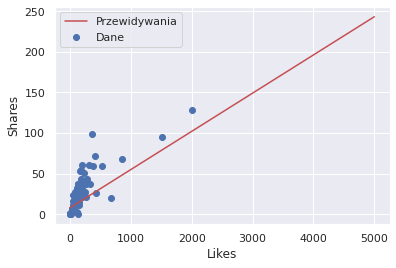

In [48]:
plot_rooms(x,y)